# Tensorflow Version

## Hello World: Linear regression

In [1]:
import tensorflow
from tensorflow.keras import Sequential, layers
import numpy as np
import matplotlib.pyplot as plt
print(tensorflow.__version__)

2.17.0


In [2]:
# Data that serves as input.

xs = np.array([-1, 0, 1, 2, 3, 4], dtype='float32')
ys = np.array([-3, -1, 1, 3, 5, 7], dtype='float32')

In [3]:
# Model creation and compilation.

model = Sequential([
                    layers.Dense(
                        input_shape=[1],  # Because we are going to take one xs value at a time in the NN.
                        units=1           # One neuron.
                    )
])

model.compile(
    loss='mse',
    optimizer='sgd',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Fitting the training data in the model.

model.fit(
    xs,
    ys,
    epochs=500
)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 21.0240
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0000e+00 - loss: 16.8121
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0000e+00 - loss: 13.4927
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.0000e+00 - loss: 10.8758
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1667 - loss: 8.8115
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1667 - loss: 7.1822
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.1667 - loss: 5.8953
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.1667 - loss: 4.8777
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.1667 - loss: 4.0722
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1667 - loss: 3.4337
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1667 - loss: 2.9266
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step -

In [6]:
# Prediction.

model.predict(np.array([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[18.98048]], dtype=float32)

# Pytorch Version

## Hello World: Linear Regression

In [3]:
# Import Libraries

import torch

In [4]:
# Declare the single linear layer.

modelPytorch = torch.nn.Linear(
    in_features=1,
    out_features=1
    )

print(modelPytorch)

Linear(in_features=1, out_features=1, bias=True)


In [5]:
# Reshaping the tensors. Originally they were (1,6), this time is (6,1).
# What this does is give a full row at a time to the model.

xsTensor = torch.tensor(xs).reshape(-1,1)
ysTensor = torch.tensor(ys).reshape(-1,1)
print(xsTensor)


tensor([[-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.]])


In [6]:
# The initial weights and biases of the model.
for cell in modelPytorch.parameters():
  print(cell)

Parameter containing:
tensor([[-0.1791]], requires_grad=True)
Parameter containing:
tensor([0.6302], requires_grad=True)


In [7]:
# The loss and optimization parameters.

crit = torch.nn.MSELoss()
opti = torch.optim.SGD(modelPytorch.parameters(), lr=0.01)
print(opti.defaults)

{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None}


In [8]:
# A loop on a number of epochs.
lossList = []

for epoch in range(500):
    pred = modelPytorch(xsTensor)        # Extract predictions on the training data
    loss = crit(pred, ysTensor)          # Calculate the loss between the predicted and the original output.

    # Backpropagation
    opti.zero_grad()                     # Resets the gradients of all model parameters to zero.
    loss.backward()                      # The Pytorch automatic gradient function, to extract the loss' gradients.
    opti.step()

    lossList.append(loss.item())                          # Function that updates the model's parameters based on the calculated gradients.

    print(f"Epoch {epoch}:--------->loss: {loss:>7f}")

Epoch 0:--------->loss: 16.534990
Epoch 1:--------->loss: 13.499366
Epoch 2:--------->loss: 11.101009
Epoch 3:--------->loss: 9.204231
Epoch 4:--------->loss: 7.702274
Epoch 5:--------->loss: 6.511141
Epoch 6:--------->loss: 5.564744
Epoch 7:--------->loss: 4.811083
Epoch 8:--------->loss: 4.209245
Epoch 9:--------->loss: 3.727036
Epoch 10:--------->loss: 3.339125
Epoch 11:--------->loss: 3.025578
Epoch 12:--------->loss: 2.770708
Epoch 13:--------->loss: 2.562171
Epoch 14:--------->loss: 2.390251
Epoch 15:--------->loss: 2.247302
Epoch 16:--------->loss: 2.127302
Epoch 17:--------->loss: 2.025514
Epoch 18:--------->loss: 1.938204
Epoch 19:--------->loss: 1.862434
Epoch 20:--------->loss: 1.795889
Epoch 21:--------->loss: 1.736743
Epoch 22:--------->loss: 1.683558
Epoch 23:--------->loss: 1.635200
Epoch 24:--------->loss: 1.590773
Epoch 25:--------->loss: 1.549570
Epoch 26:--------->loss: 1.511032
Epoch 27:--------->loss: 1.474716
Epoch 28:--------->loss: 1.440272
Epoch 29:--------->lo

In [9]:
lossList

[16.534990310668945,
 13.49936580657959,
 11.101009368896484,
 9.204231262207031,
 7.702274322509766,
 6.511140823364258,
 5.564743518829346,
 4.8110833168029785,
 4.209244728088379,
 3.7270357608795166,
 3.339124917984009,
 3.0255775451660156,
 2.770707845687866,
 2.56217098236084,
 2.390251398086548,
 2.2473018169403076,
 2.127302408218384,
 2.0255138874053955,
 1.9382039308547974,
 1.8624343872070312,
 1.7958887815475464,
 1.7367428541183472,
 1.6835581064224243,
 1.6352001428604126,
 1.5907734632492065,
 1.5495704412460327,
 1.511032223701477,
 1.474716305732727,
 1.4402719736099243,
 1.4074207544326782,
 1.3759411573410034,
 1.3456562757492065,
 1.3164244890213013,
 1.288132667541504,
 1.2606886625289917,
 1.2340185642242432,
 1.208061695098877,
 1.182767629623413,
 1.1580954790115356,
 1.134010672569275,
 1.1104838848114014,
 1.0874899625778198,
 1.0650078058242798,
 1.0430179834365845,
 1.0215044021606445,
 1.0004515647888184,
 0.9798462986946106,
 0.959676206111908,
 0.93992948

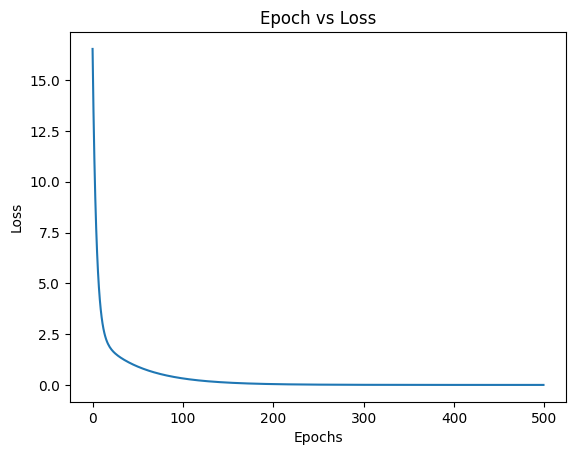

In [11]:
import matplotlib.pyplot as plt

# Sample data
x = lossList

# Create the plot
plt.plot(x)

# Add labels and a title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')

# Show the plot
plt.show()

In [12]:
# The resulting mode weights and biases.

for cell in modelPytorch.parameters():
  print(cell)

Parameter containing:
tensor([[1.9962]], requires_grad=True)
Parameter containing:
tensor([-0.9882], requires_grad=True)


In [13]:
# Test predicting a value not seen in the original training set.

modelPytorch(torch.tensor(10.).reshape(-1,1))

tensor([[18.9738]], grad_fn=<AddmmBackward0>)

# Observations

|Pytorch|Keras|
|-------|-----|
|More coding|Less coding|
|Gray box|Black box|
|Does not accepts Numpy arrays in model| Does accept Numpy arrays|
|Pythonic Loop|Built-in Loop|
|Faster learning|Slower Learning|



